# Exploratory Data Analysis (EDA) of UFC dataset

Created by Jan Baljan for course on Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

## 1. Read data and check column

In [2]:
df = pd.read_csv("../datasets/data.csv")

df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Anthony Smith,Khalil Rountree Jr.,Mark Smith,2023-12-09,"Las Vegas, Nevada, USA",Blue,False,LightHeavyweight,0.846558,0.003906,0.513517,0.442042,0.000000,0.013328,0.000977,0.000122,0.000000,0.000000,91.936035,37.195679,88.720215,41.244995,93.035400,38.033447,92.940186,44.925903,0.125000,0.000000,1.404053,0.065430,73.664795,22.621338,67.108032,23.292358,10.156006,7.614380,12.142578,9.675049,8.115234,6.959961,9.469604,8.277588,84.911133,32.224121,85.758179,39.245361,4.540649,3.426392,2.648438,1.780273,2.484253,1.545166,0.313599,0.219360,17.937744,4.995972,413.148804,26,1,0,2,4,8,6,0,0.0,1.0,1.0,6.0,0.0,0.0,Southpaw,185.42,193.04,205.0,0.125420,0.011841,0.538892,0.401560,0.264596,0.284723,0.081066,0.000002,0.000017,0.015686,105.356533,59.717880,155.639414,60.519283,106.912781,61.244738,165.833305,68.061056,2.421747,0.770084,0.928648,0.353144,68.010708,29.193089,118.783186,32.606531,13.347809,9.542440,17.966904,10.427622,23.998016,20.982351,18.889324,17.485130,103.846695,58.651762,140.668631,49.713648,0.803675,0.524130,2.329470,1.785358,0.706163,0.541988,12.641314,9.020277,62.802755,79.061634,778.111862,50,1,0,1,3,12,8,0,0.0,1.0,1.0,5.0,4.0,1.0,Orthodox,193.04,193.04,205.0,33.0,35.0
1,Song Kenan,Kevin Jousset,Mark Smith,2023-12-09,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.000000,0.000000,0.500000,0.660000,1.000000,0.000000,1.000000,0.000000,0.0000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 8.1+ MB


There are 144 features divided in features for the 'Red corner' fighter and the 'Blue corner' fighter. In addition, there are some generic features. 

In [7]:
red_cols = []
blue_cols = []
generic_cols = []

for col in df.columns:
    # select right list to append col based on col starting with R_ or B_
    # Python treats booleans as ordinary numbers
    (generic_cols, red_cols, blue_cols)[col.startswith("R_") or 2 * col.startswith("B_")].append(col)

print(f"Red fighter features:  {len(red_cols)}")
print(f"Blue fighter features: {len(blue_cols)}")
print(f"Generic features:      {len(generic_cols)}")

Red fighter features:  69
Blue fighter features: 69
Generic features:      6


## 2. Exploring generic features

First, we can analyse and explore the distributions of the *generic* features by counting/time-series. For each, some questions were formulated:
- **Referee**
  - Who has referee'd the most (by weight class, by title bout)?
- **Date**
  - How many matches and how far apart over time?
- **Location**
  - What is the distribution of matches in certain locations?
- **Winner**
  - What is the distribution of red/blue wins?
  - What is the distribution of red/blue wins given weight class?

In [8]:
generic_cols

['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class']

### 2.1. Referee counts

<AxesSubplot: title={'center': "Number of matches Referee'd"}>

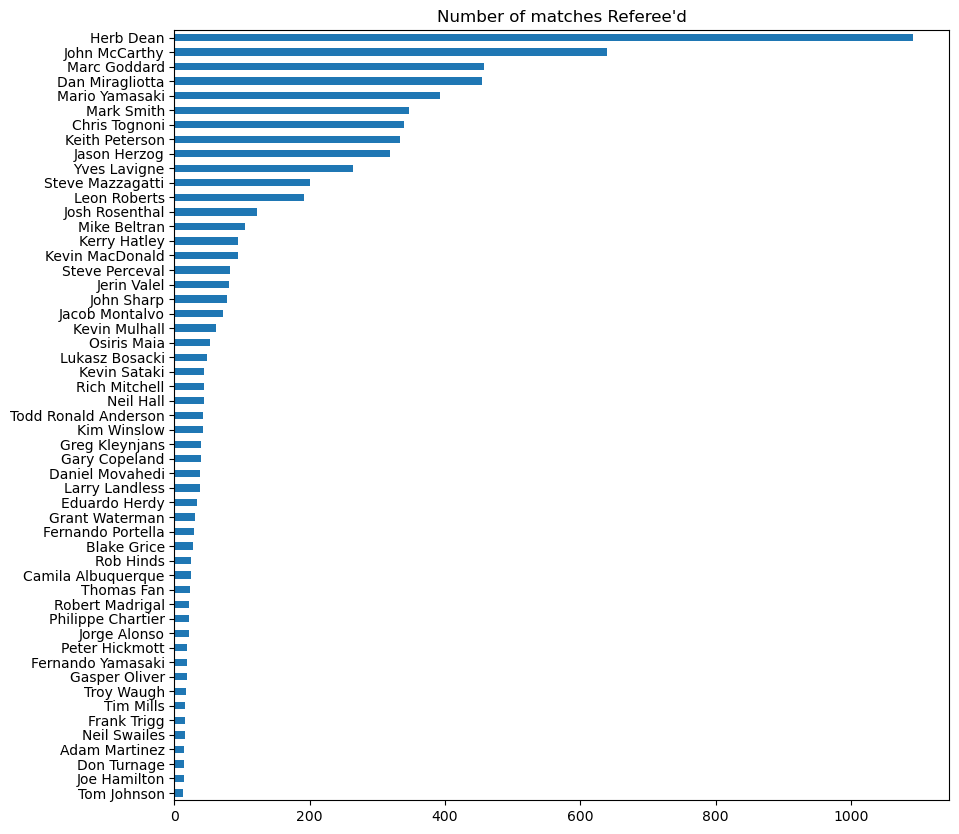

In [9]:
ref_counts = df['Referee'].value_counts()
# cut-off at 75 percent quantile for graphical convenience
ref_counts = ref_counts[ref_counts > ref_counts.quantile(.75)][::-1]
ref_counts.plot(kind='barh', figsize=(10, 10), title="Number of matches Referee'd")

We see that Herb Dean, an active UFC referee, has called over a thousand fights. This may become important later on, if we conclude that Dean's calls lead to imbalance and/or dependence. Next, let us look at the ref counts conditioned on specific weight classes. According to [WSN](https://www.wsn.com/ufc/weight-classes/), there are currently 12 weight classes, 8 belonging to the men's division, and 4 belonging to the women's division. However, the 4 women divisions are less stable compared to the men divisions, meaning that the UFC management is more easily inclined to pull the plug on a female division if it does not bring in enough revenue.  

Since the dataset contains historical data, there is also the [open weight](https://en.wikipedia.org/wiki/Openweight) class, which is not used anymore. In addition, there is the [catch weight](https://en.wikipedia.org/wiki/Catchweight) class, which is used as the weight class that does not adhere to the traditional limits of the other weight classes. For example, when fighters are unable to make the weight, they can agree upon a catch weight, so that the event can still continue. 

In [36]:
weight_classes = df['weight_class'].unique()
sorted(weight_classes)

['Bantamweight',
 'CatchWeight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'LightHeavyweight',
 'Lightweight',
 'Middleweight',
 'OpenWeight',
 'Welterweight',
 'WomenBantamweight',
 'WomenFeatherweight',
 'WomenFlyweight',
 'WomenStrawweight']

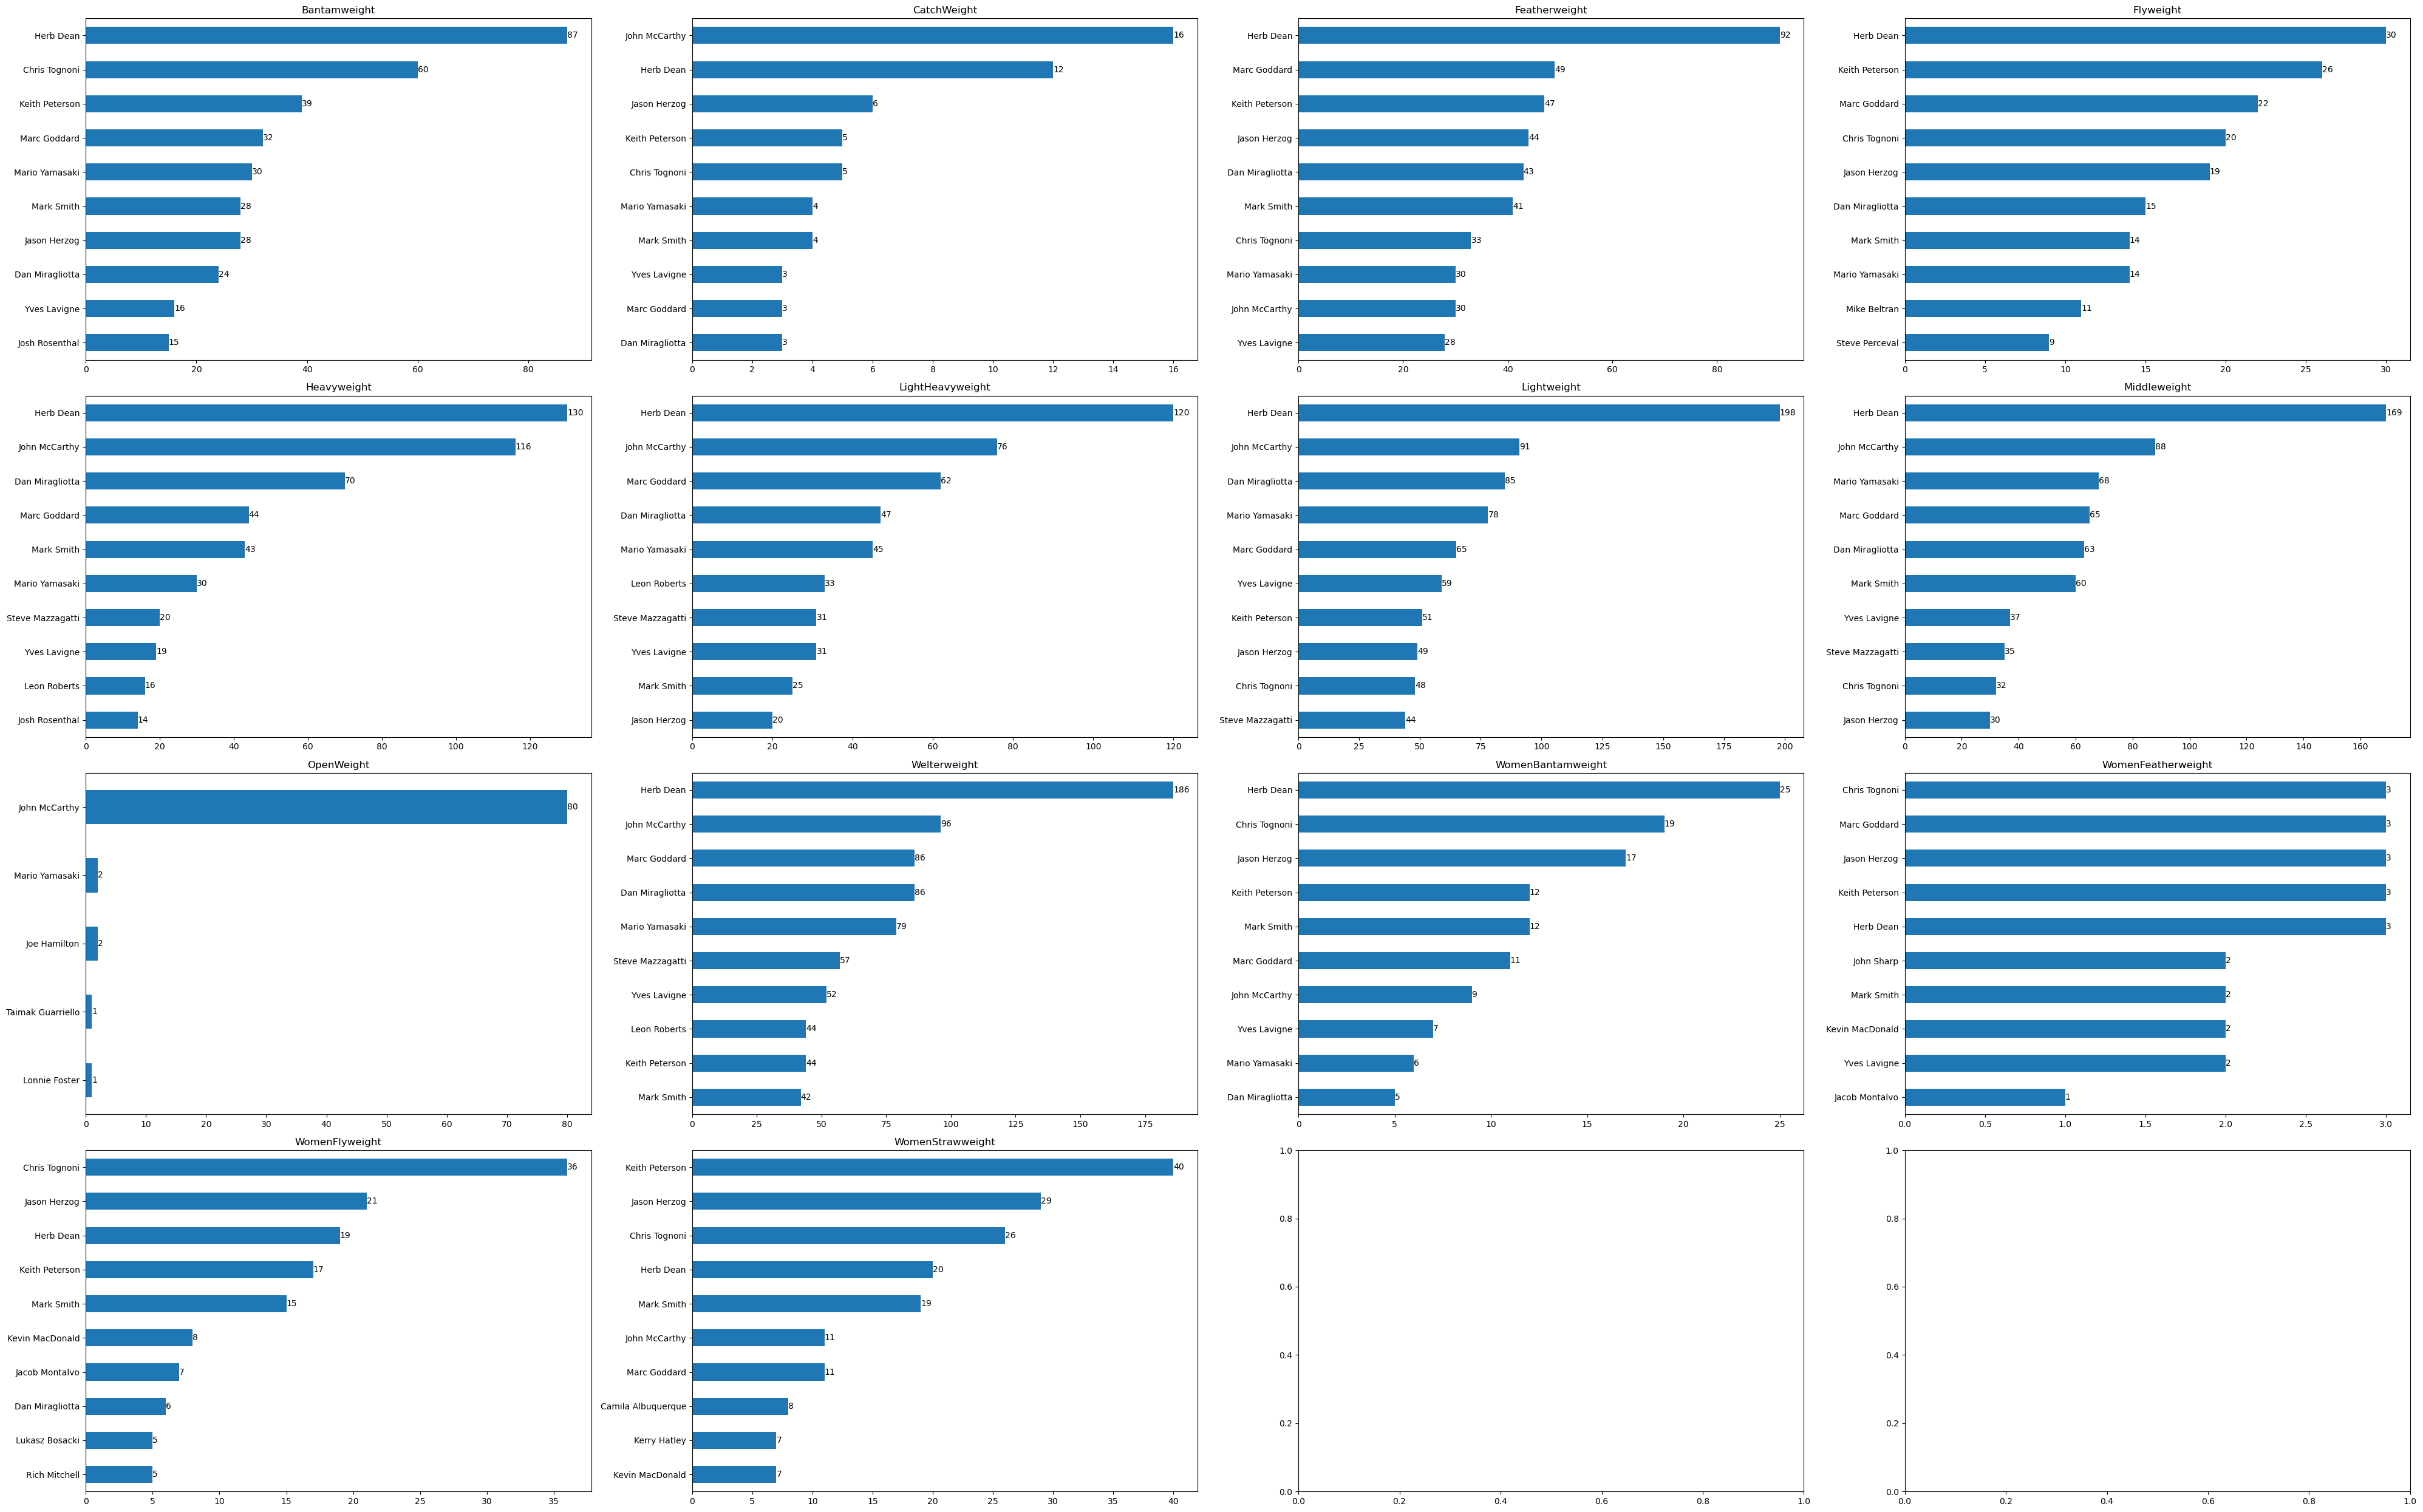

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(40, 25))
axes = axes.flatten()

for ax, wc in zip(axes, sorted(weight_classes)):
    ref_counts = df[df['weight_class'] == wc]['Referee'].value_counts()
    # To simplify the visualisations, we take the top 10 refs
    ref_counts = ref_counts[:10]
    ax = ref_counts[::-1].plot(kind='barh', title=wc, ax=ax)
    ax.bar_label(ax.containers[0])

plt.tight_layout()

Another important insight is looking at the ref counts conditioned on title bouts. Title bouts are often the subject of discussion in the MMA community due to the "bad" referee calls or upsets in the conclusion of the bout. 

In [22]:
df['title_bout'].value_counts()

False    7007
True      417
Name: title_bout, dtype: int64

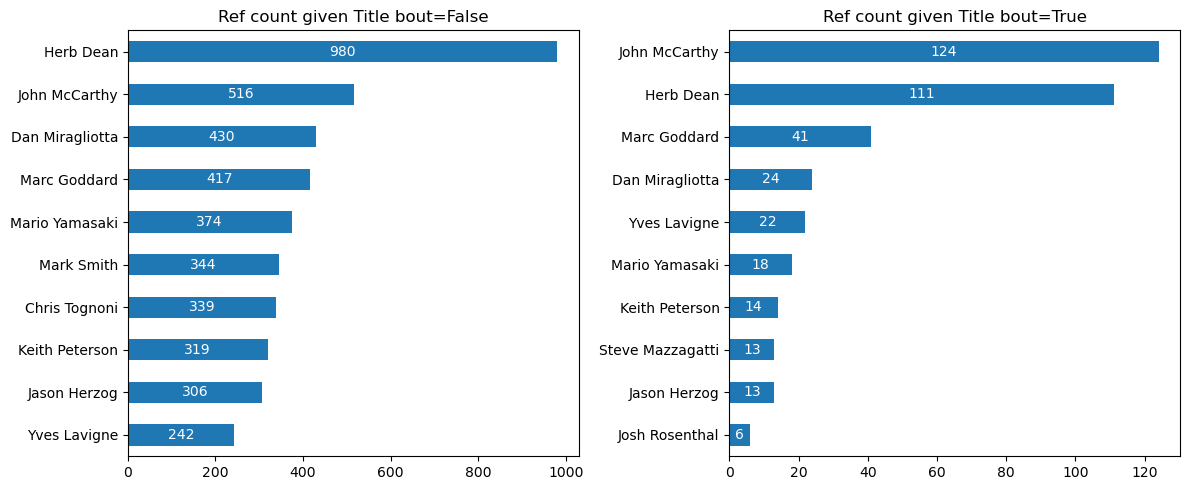

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, cond in zip(axes, [False, True]):
    ref_counts = df[df['title_bout'] == cond]['Referee'].value_counts()
    ref_counts = ref_counts[:10]
    ax = ref_counts[::-1].plot(kind='barh', title=f"Ref count given Title bout={cond}", ax=ax)
    ax.bar_label(ax.containers[0], label_type='center', color='white')


plt.tight_layout()

Interestingly, John McCarthy called slightly more title bouts than the highly experienced Herb Dean, whereas Herb Dean called almost double the amount of non-title bouts compared to John McCarthy. 

### 2.2. Distribution of UFC events over time

We can plot the distributions of UFC events over the time span of 1994-2023.

C:\Users\janba\AppData\Local\Temp\ipykernel_4184\2148047127.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


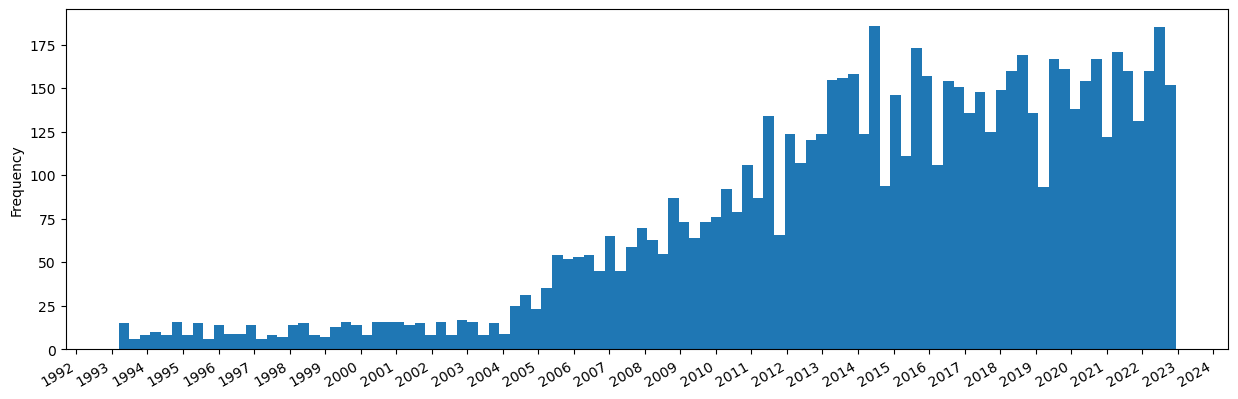

In [56]:
from datetime import datetime
import matplotlib.dates as mdate

# converted dates to numeric values
numeric_dates = pd.to_datetime(df['date']).apply(lambda x: x.toordinal())
ax = numeric_dates.plot(kind='hist', bins=100, figsize=(15, 5))

locator = mdate.YearLocator()
ax.xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# convert numeric back to year to show as the xticks
x_ticks = ax.get_xticks()
xlabels = [datetime.fromordinal(int(x)-1).strftime("%Y") for x in x_ticks]
ax.set_xticklabels(xlabels)

plt.show()

The above plot indicates an increase in frequency of UFC events over the years, starting in 2004, from which it is clear that the sport has grown in popularity over the years. Furthermore, notice the lack of events in 2019, which can be attributed to the adjustment period of the COVID regulations around the world. 

For the purpose of prediction, it is important to note that the sport of MMA is relatively young (compared to other commercialised martial arts, e.g., boxing), and therefore, not only is the sport growing in popularity, but also the skill level of the fighters is growing. In other words, the fight statistics of someone in 1997 may not yield the same **predictive power** as the statistics of someone in 2017 (due to changing strategies, martial arts, diets, professionalism, etc.). We will explore these differences as well.

### 2.3. Distribution of geographic locations

The `location` column contains comma-separated entries of locations in the form of [city, state, country]. 

In [57]:
df['location']

0       Las Vegas, Nevada, USA
1       Las Vegas, Nevada, USA
2       Las Vegas, Nevada, USA
3       Las Vegas, Nevada, USA
4       Las Vegas, Nevada, USA
                 ...          
7419     Denver, Colorado, USA
7420     Denver, Colorado, USA
7421     Denver, Colorado, USA
7422     Denver, Colorado, USA
7423     Denver, Colorado, USA
Name: location, Length: 7424, dtype: object

However, there are entries that are exceptions to this rule, that is, the dataset does not specify the 3-tier structure of information. For example, `[San Juan, Puerto Rico]`. These are set to NaN. 

In [58]:
loc_list = df['location'].apply(lambda x: np.array([xi.strip(' ') for xi in x.split(',')]))
col_names = ['city', 'state', 'country']

# some locations are not defined by [city, state, country] and must be set to NaN
for i in loc_list.index:
    if len(loc_list[i]) < 3:
        loc_list[i] = np.insert(loc_list[i], 0, 'nan') # setting this to np.nan doesn't work due to next conversion

loc_df = pd.DataFrame(np.column_stack([loc_list.tolist()]), columns=col_names)
loc_df = loc_df.replace('nan', np.nan)
loc_df.isna().sum()

city       538
state        0
country      0
dtype: int64

We can visualize the distribution of fights conditioned on country and also conditioned on the states of the country with the most fights, i.e., USA.

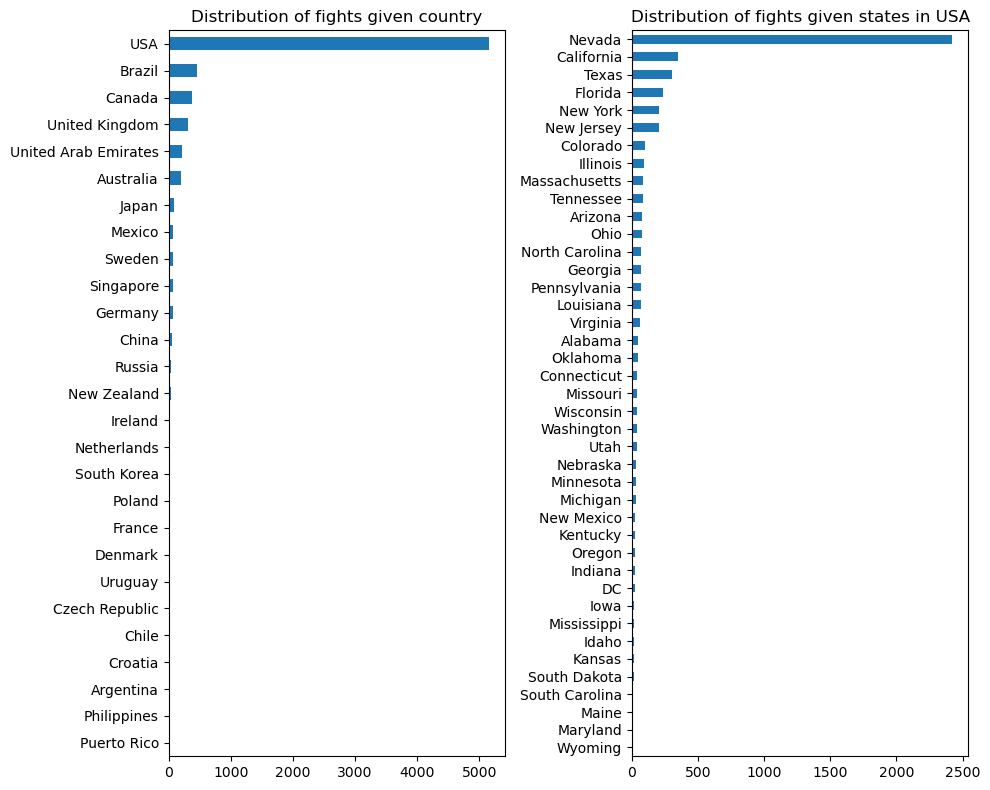

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

country_counts = loc_df['country'].value_counts()
country_counts[::-1].plot(kind='barh', title='Distribution of fights given country', ax=axes[0])

USA_counts = loc_df[loc_df['country'] == 'USA']['state'].value_counts()
USA_counts[::-1].plot(kind='barh', title='Distribution of fights given states in USA', ax=axes[1])
fig.tight_layout()

It seems that Nevada, USA, specifically Las Vegas, is an important location to host UFC events. 

### 2.4. Distribution of Winners

The dataset contains, for each record, an account of the result of the match. In other words, the target variable indicating whether the 'Red corner' won or the 'Blue corner' won. Starting with the distribution of red/blue wins we get the following.

[Text(0, 0, '2503'), Text(0, 0, '4780'), Text(0, 0, '139')]

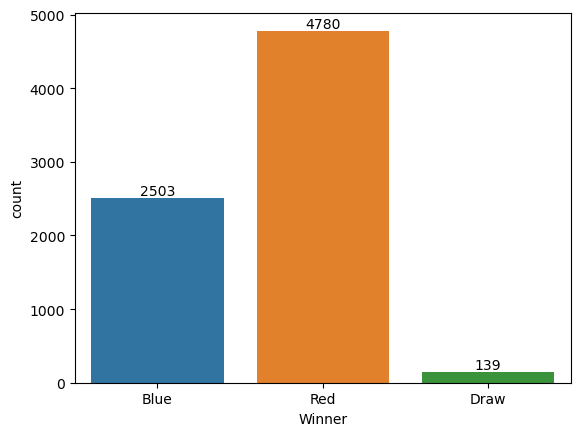

In [61]:
ax = sns.countplot(df, x='Winner')
ax.bar_label(ax.containers[0])

This may seem very surprising, without some context on the way the dataset was aggregated. The red/blue corner is **not** an arbitrary chosen label for the fighters. Rather, the color of the corner represents who is the **underdog** and who is the **favourite** to win.
- **Red corner**: favourite
- **Blue corner**: underdog

A general method to measure the imbalance of the data is via the **Shannon entropy** measure. Formally, Shannon entropy is a measure of uncertainty (or variability) associated with random variables. Given $N$ instances, $k$ classes of size $N_i$, entropy is computed as follows:
$$
    H = -\sum_{i=1}^k \dfrac{N_i}{N} \log \dfrac{N_i}{N}
$$
Where:
- $H = 0$ if there is 1 class, i.e., dataset is very unbalanced.
- $H = \log k$ when all classes are balanced, each with the same size $N/k$.

Thus, we can normalise the measure by dividing $H$ by $\log k$ to get a measure between 0 and 1. Note that the normalisation has the pleasant side-effect that the formula becomes invariant to the logarithm base. 
$$
    \text{Balance} = \dfrac{H}{\log k}
$$
Where Balance $\in [0, 1]$, and zero balance means unbalance, and balance of one corresponds to full class balance.

In [170]:
def balance(df: pd.DataFrame, col: str):
    counts = df[col].value_counts()
    k = counts.shape[0]
    if k < 2: 
        print(f"Warning: found one class k = 1, which is always fully balanced")
        return 1 
    N = df.shape[0]
    return -np.sum(counts/N * np.log(counts/N)) / np.log(k)

balance(df, 'Winner')

0.6594820218453336

We can also look at the class balance of `Winner` conditioned on `weight_class`.

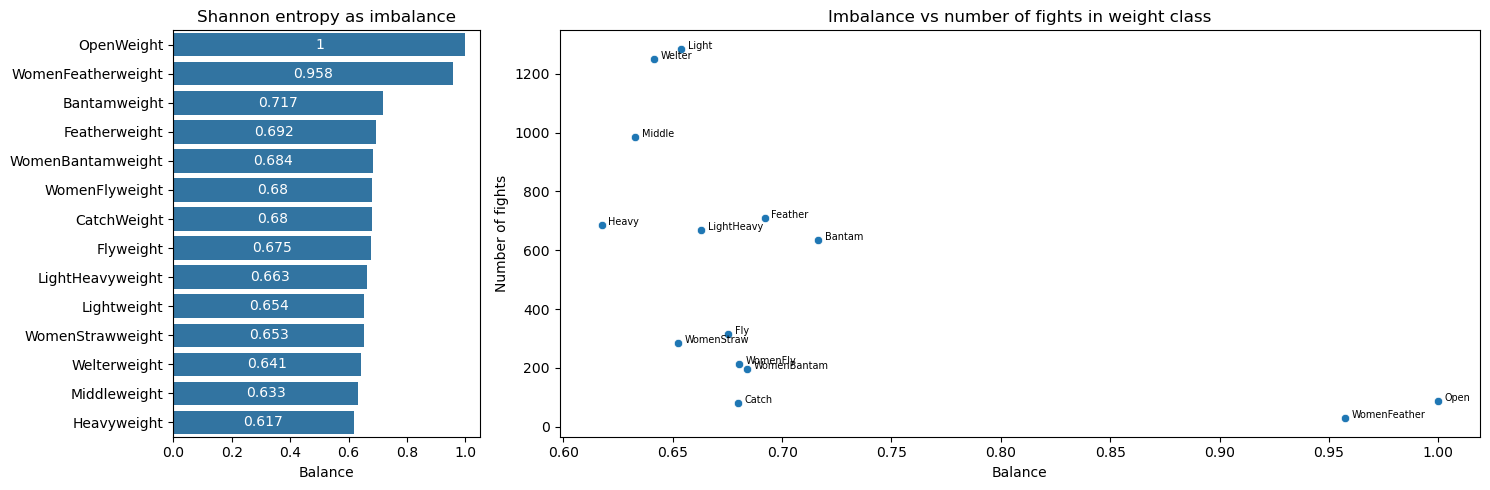

In [171]:
weight_classes = df['weight_class'].unique()

balance_wc = np.array([
    balance(df[df['weight_class'] == wc], 'Winner') 
    for wc in weight_classes
])
sort_indices = np.argsort(balance_wc)[::-1]
balance_wc = balance_wc[sort_indices]
weight_classes = weight_classes[sort_indices]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 3]})

sns.barplot(x=balance_wc, y=weight_classes, color='C0', ax=ax1)
ax1.bar_label(ax1.containers[0], fmt='%.3g', label_type='center', color='white')
ax1.set_title("Shannon entropy as imbalance")
ax1.set_xlabel("Balance")

p_wc = df['weight_class'].value_counts()
p_wc = p_wc[weight_classes]
sns.scatterplot(x=balance_wc, y=p_wc, ax=ax2)
ax2.set_xlabel("Balance")
ax2.set_ylabel("Number of fights")
ax2.set_title("Imbalance vs number of fights in weight class")
for i, wc in enumerate(weight_classes):
    ax2.annotate(wc[:-6], (balance_wc[i]+.003, p_wc[i]), fontsize=7)

plt.tight_layout()

We can see that the imbalancedness with respect to `Winner` is approximately equal to the imbalancedness of the `Winner` given `weight_class`. The outliers are the open and women featherweight divisions, but as can be seen in the right subplot, their proportion is relatively small, and thus, these contribute little to the overal imbalance.  

## 3. Exploring fight features

Besides the generic features, there are 69 features dedicated to the red/blue fighter. These are further subdivided

In [188]:
case = df.iloc[0]

case['R_avg_opp_KD'], case['B_avg_opp_KD']

(0.0118408203125, 0.00390625)

In [183]:
len(red_cols), red_cols

(69,
 ['R_fighter',
  'R_avg_KD',
  'R_avg_opp_KD',
  'R_avg_SIG_STR_pct',
  'R_avg_opp_SIG_STR_pct',
  'R_avg_TD_pct',
  'R_avg_opp_TD_pct',
  'R_avg_SUB_ATT',
  'R_avg_opp_SUB_ATT',
  'R_avg_REV',
  'R_avg_opp_REV',
  'R_avg_SIG_STR_att',
  'R_avg_SIG_STR_landed',
  'R_avg_opp_SIG_STR_att',
  'R_avg_opp_SIG_STR_landed',
  'R_avg_TOTAL_STR_att',
  'R_avg_TOTAL_STR_landed',
  'R_avg_opp_TOTAL_STR_att',
  'R_avg_opp_TOTAL_STR_landed',
  'R_avg_TD_att',
  'R_avg_TD_landed',
  'R_avg_opp_TD_att',
  'R_avg_opp_TD_landed',
  'R_avg_HEAD_att',
  'R_avg_HEAD_landed',
  'R_avg_opp_HEAD_att',
  'R_avg_opp_HEAD_landed',
  'R_avg_BODY_att',
  'R_avg_BODY_landed',
  'R_avg_opp_BODY_att',
  'R_avg_opp_BODY_landed',
  'R_avg_LEG_att',
  'R_avg_LEG_landed',
  'R_avg_opp_LEG_att',
  'R_avg_opp_LEG_landed',
  'R_avg_DISTANCE_att',
  'R_avg_DISTANCE_landed',
  'R_avg_opp_DISTANCE_att',
  'R_avg_opp_DISTANCE_landed',
  'R_avg_CLINCH_att',
  'R_avg_CLINCH_landed',
  'R_avg_opp_CLINCH_att',
  'R_avg_opp_CL

In [179]:
len([c for c in red_cols if '_opp_' not in c])

45

In [12]:
df[(df['weight_class'] == 'OpenWeight') | (df['weight_class'] == 'CatchWeight')]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
47,John Castaneda,Kyung Ho Kang,Dan Miragliotta,2023-11-11,"New York City, New York, USA",Red,False,CatchWeight,0.671875,0.015625,0.579277,0.438979,0.565093,0.084004,0.527344,0.133301,0.004395,0.136230,75.607910,45.234375,102.869629,41.928711,99.306641,65.538086,132.203125,64.700195,1.671875,0.814453,1.328613,0.423828,63.869141,35.204590,80.695312,25.98291,3.835449,2.447266,10.095215,5.617676,7.903320,7.582520,12.079102,10.328125,69.917969,40.814941,98.406250,38.563965,0.791992,0.431152,2.135742,1.502441,4.897949,3.988281,2.327637,1.862305,90.342285,84.042480,509.735352,30,0,0,2,3,8,4,0,0.0,3.0,1.0,0.0,4.0,0.0,Orthodox,175.26,185.42,135.0,0.93750,0.250,0.478125,0.418125,0.375000,0.208125,0.125000,0.000000,0.000000,0.000,100.562500,47.562500,141.250000,61.250000,122.375000,67.125000,166.000000,78.062500,4.68750,2.250000,4.375000,0.625000,81.750000,34.875000,116.812500,43.187500,9.50000,5.375000,15.500000,10.812500,9.312500,7.312500,8.937500,7.250000,90.437500,40.062500,122.62500,49.562500,5.125000,3.625000,17.937500,11.125000,5.000000,3.875000,0.687500,0.562500,173.062500,74.312500,753.250000,12,0,0,1,2,3,2,0,0.0,0.0,1.0,1.0,1.0,0.0,Switch,167.64,180.34,135.0,36.0,31.0
50,Elves Brener,Kaynan Kruschewsky,Osiris Maia,2023-11-04,"Sao Paulo, Sao Paulo, Brazil",Red,False,CatchWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [291]:
df['title_bout'].value_counts()

False    7007
True      417
Name: title_bout, dtype: int64

In [20]:
df.groupby('title_bout')['Referee']

In [21]:
df.groupby('title_bout')['Referee'].agg(['value_counts'])

value_counts
title_bout Referee                        
False      Herb Dean                   980
           John McCarthy               516
           Dan Miragliotta             430
           Marc Goddard                417
           Mario Yamasaki              374
...                                    ...
True       John Sharp                    1
           Kevin Sataki                  1
           Osiris Maia                   1
           Philippe Chartier             1
           Robert Madrigal               1

[244 rows x 1 columns]

## Missing values analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 8.1+ MB


In [105]:
df.isna().sum().sum()

121106

In [104]:
df.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
       ... 
7419    103
7420    103
7421    104
7422    102
7423    106
Length: 7424, dtype: int64

## Pound for pound (P4P) ranking analysis
We can start by analysing the extremes of fighters, i.e., the pound for pound (p4p) best fighters and the "worst" fighters. This enables us to see which factors may contribute to the success of fighters. Conveniently, the UFC website has a p4p [ranking](https://www.ufc.com/rankings) that is actively maintained.

Current men's P4P ranking:
1. Islam Makhachev	
2. Jon Jones	
3. Alexander Volkanovski	
4. Leon Edwards	
5. Alex Pereira	
6. Charles Oliveira	
7. Sean Strickland
8. Sean O'Malley
9. Israel Adesanya	
10. Alexandre Pantoja	
11. Aljamain Sterling	
12. Tom Aspinall	
13. Max Holloway	
14. Kamaru Usman	
15. Jiří Procházka

We can first look at the win/loss/draws of each fighter to see how their fight history (in the UFC organisation) has been going on since joining. 

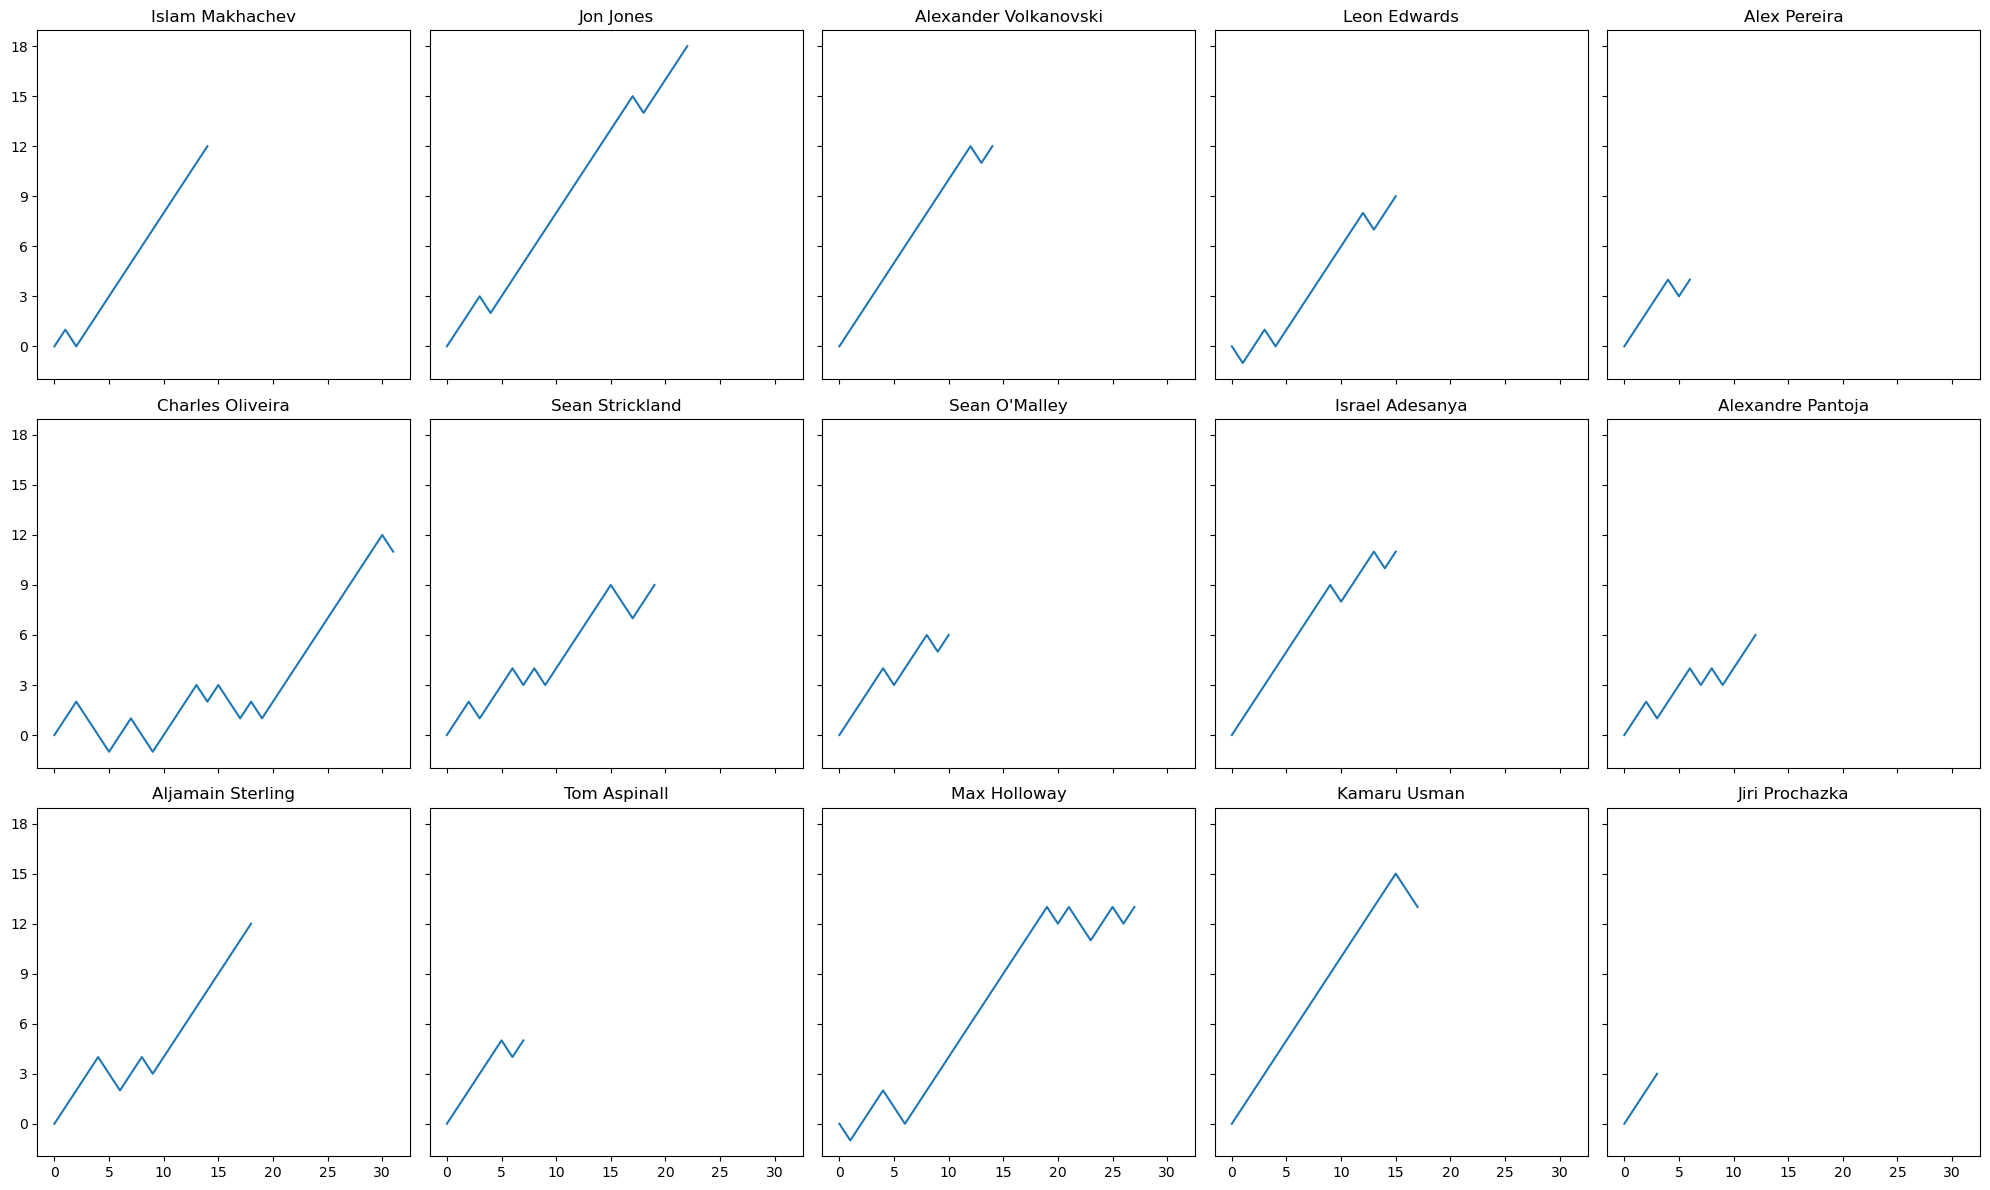

In [99]:
from matplotlib.ticker import MaxNLocator

p4p = np.array([
    "Islam Makhachev",
    "Jon Jones",
    "Alexander Volkanovski",
    "Leon Edwards",
    "Alex Pereira",
    "Charles Oliveira",
    "Sean Strickland",
    "Sean O'Malley",
    "Israel Adesanya",
    "Alexandre Pantoja",
    "Aljamain Sterling",
    "Tom Aspinall",
    "Max Holloway",
    "Kamaru Usman",
    "Jiri Prochazka",
])

fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

r_list = ["R_wins", "R_losses", "R_draw"]
b_list = ["B_wins", "B_losses", "B_draw"]

records = []

for i, fighter in enumerate(p4p):

    red_df = df[(df['R_fighter'] == fighter)]
    blue_df = df[(df['B_fighter'] == fighter)]

    red_record = red_df[["R_fighter", "B_fighter", "R_wins", "R_losses", "R_draw"]]
    red_record = red_record.rename(columns=lambda x: x[2:] if x in r_list else x)
    blue_record = blue_df[["R_fighter", "B_fighter", "B_wins", "B_losses", "B_draw"]]
    blue_record = blue_record.rename(columns=lambda x: x[2:] if x in b_list else x)
    total_record = pd.concat([red_record, blue_record]).sort_index()[::-1]

    diff = (total_record['wins'] - total_record['losses']).to_numpy()
    draw_diff = np.diff(total_record['draw'], 1, axis=0)
    draw_diff_indices = np.where(draw_diff != 0)[0]
    diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
    sns.lineplot(x=list(range(diff.shape[0])), y=diff, ax=axes[i])
    axes[i].set_title(fighter)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

    records.append([fighter, *total_record.iloc[-1:, 2:].to_numpy().ravel()])

plt.tight_layout()


The above plot shows the wins minus the losses at each time step (new fight) in the fighter's career. Looking at the above plots, it is clear that some fighters are exceptional from the beginning, only losing a few times in their career, e.g., Jon Jones and Islam Makhachev, whereas some fighters thrived later in their career, e.g., Charles Oliveira. In the case of the latter, the bumpy spikes indicate wins and losses early on, and a steep climb later on. 

It is noteworthy to mention that the last fights are not incorporated in this visualisation. Furthermore, the "No Contest" (NC) ruling is also regarded as a loss, as can be see in the plot of Jon Jones whose record is 27-1-0 (1 NC). 

<AxesSubplot: title={'center': 'P4P win/loss counts'}, ylabel='fighter'>

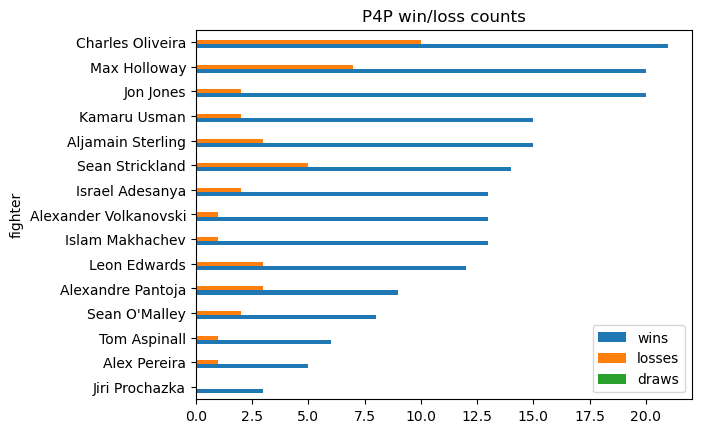

In [97]:
p4p_records = pd.DataFrame(records, columns=['fighter', 'wins', 'losses', 'draws']).sort_values('wins')

p4p_records.plot(x='fighter', kind='barh', title="P4P win/loss counts")

In [53]:
df[df['R_fighter'].str.contains('Prochazka') | df['B_fighter'].str.contains('Prochazka')]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
41,Jiri Prochazka,Alex Pereira,Marc Goddard,2023-11-11,"New York City, New York, USA",Blue,True,LightHeavyweight,0.09375,0.25,0.670312,0.544063,0.125,0.232813,0.5,1.0,0.0,0.0,95.53125,63.90625,91.5,49.875,128.0,93.25,116.03125,69.65625,0.125,0.125,4.96875,1.75,46.125,22.5625,66.28125,32.0,24.0,20.8125,14.6875,8.75,25.40625,20.53125,10.53125,9.125,87.125,56.875,81.40625,42.6875,7.6875,6.375,4.0625,2.15625,0.71875,0.65625,6.03125,5.03125,9.59375,289.5625,803.1875,16,2,4,0,4,5,1,0,0.0,1.0,1.0,3.0,0.0,0.0,Orthodox,193.04,200.66,205.0,0.500000,0.00000,0.542500,0.595000,0.250000,0.395000,0.500000,0.750000,2.000000,1.000000,154.750000,87.500000,130.500000,81.500000,175.000000,106.250000,158.250000,107.500000,0.250000,0.250000,9.000000,2.750000,141.500000,75.500000,111.750000,66.250000,12.000000,10.750000,15.000000,12.000000,1.250000,1.250000,3.750000,3.250000,119.750000,63.750000,91.000000,47.000000,6.000000,4.250000,3.750000,3.250000,29.000000,19.500000,35.750000,31.250000,158.750000,305.000000,965.500000,9,1,3,0,3,3,0,0,0.0,0.0,0.0,2.0,1.0,0.0,Orthodox,190.50,203.20,205.0,36.0,31.0
790,Glover Teixeira,Jiri Prochazka,Marc Goddard,2022-06-11,"Kallang, Singapore",Blue,True,LightHeavyweight,1.00000,0.00,0.505000,0.510000,0.500,0.500000,0.0,0.5,0.0,0.0,104.50000,55.00000,100.0,52.000,105.0,55.50,104.50000,56.00000,0.500,0.500,1.00000,0.50,93.000,45.0000,78.50000,3

In [48]:
df.filter(like="Ji", axis=2)

ValueError: No axis named 2 for object type DataFrame

In [ ]:
r_list = ["R_wins", "R_losses", "R_draw"]
b_list = ["B_wins", "B_losses", "B_draw"]
for fighter in df[['R_fighter', 'B_fighter']].unstack().unique()[:100]:

    red_df = df[(df['R_fighter'] == fighter)]
    blue_df = df[(df['B_fighter'] == fighter)]

    red_record = red_df[["R_fighter", "B_fighter", "R_wins", "R_losses", "R_draw"]]
    red_record = red_record.rename(columns=lambda x: x[2:] if x in r_list else x)
    blue_record = blue_df[["R_fighter", "B_fighter", "B_wins", "B_losses", "B_draw"]]
    blue_record = blue_record.rename(columns=lambda x: x[2:] if x in b_list else x)
    total_record = pd.concat([red_record, blue_record]).sort_index()[::-1]

    diff = (total_record['wins'] - total_record['losses']).to_numpy()
    draw_diff = np.diff(total_record['draw'], 1, axis=0)
    draw_diff_indices = np.where(draw_diff != 0)[0]
    diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
    sns.lineplot(x=list(range(diff.shape[0])), y=diff, label=fighter)
plt.legend()

In [130]:
diff = (total_jones_record['wins'] - total_jones_record['losses']).to_numpy()
draw_diff = np.diff(total_jones_record['draw'], 1, axis=0)
# draw_diff = np.zeros((diff.shape[0]-1))
# draw_diff[5] = 1
# draw_diff[10] = 2
draw_diff_indices = np.where(draw_diff != 0)[0]
diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
# diff

array([ 0,  1,  2,  3,  2,  3,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12,
       13, 14, 15, 14, 15, 16, 17, 18], dtype=int64)

<AxesSubplot: ylabel='diff'>

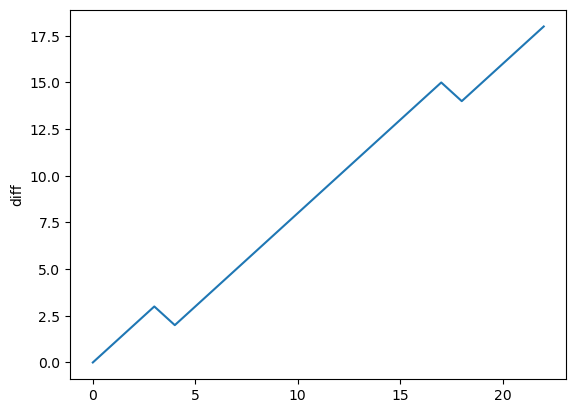

In [84]:
sns.lineplot(total_jones_record, x=range(total_jones_record.shape[0]), y='diff')

In [ ]:
sns.lineplot()

In [16]:
df.head(1).filter(regex='^R_.*').columns

Index(['R_fighter', 'R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_pct',
       'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_opp_TD_pct',
       'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV', 'R_avg_opp_REV',
       'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att',
       'R_avg_opp_SIG_STR_landed', 'R_avg_TOTAL_STR_att',
       'R_avg_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_avg_TD_att', 'R_avg_TD_landed',
       'R_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_HEAD_att',
       'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed',
       'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_opp_BODY_att',
       'R_avg_opp_BODY_landed', 'R_avg_LEG_att', 'R_avg_LEG_landed',
       'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed', 'R_avg_DISTANCE_att',
       'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att',
       'R_avg_opp_DISTANCE_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed',
       'R_avg_opp_CLINCH_att',

In [39]:
# df[]
df.isnull() == True

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
7420,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
7421,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,False
7422,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,True


[0,
 0,
 33,
 0,
 0,
 2,
 0,
 0,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 55,
 10,
 882,
 8,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 39,
 22,
 418,
 20,
 172,
 81]